In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import *


%matplotlib inline  

In [2]:
# pd.date_range('2014-05-01','2014-05-07',freq=pd.datetools.bday)
# print(pd.date_range('2014-05-01','2014-05-07',freq=pd.datetools.bday))

pd.date_range('2014-05-01','2014-05-07',freq='B')
print(pd.date_range('2014-05-01','2014-05-07',freq='B'))

DatetimeIndex(['2014-05-01', '2014-05-02', '2014-05-05', '2014-05-06',
               '2014-05-07'],
              dtype='datetime64[ns]', freq='B')


In [3]:
date_stngs = ['2014-05-01','2014-05-02','2014-05-05','2014-05-06','2014-05-07']
#tradeDates=[pd.to_datetime(date) for date in date_stngs]
tradeDates=pd.to_datetime(pd.Series(date_stngs))

In [4]:
tradeDates

0   2014-05-01
1   2014-05-02
2   2014-05-05
3   2014-05-06
4   2014-05-07
dtype: datetime64[ns]

In [5]:
closingPrices=[531.35,527.93,527.81,515.14,509.96]

In [6]:
googClosingPrices=pd.DataFrame(data=closingPrices,
                                        columns=['closingPrice'], 
                                        index=tradeDates)


In [7]:
googClosingPrices

,closingPrice
2014-05-01,531.35
2014-05-02,527.93
2014-05-05,527.81
2014-05-06,515.14
2014-05-07,509.96


In [8]:
# import pandas.io.data as web
# The financial API provided by Yahoo was discontinued. This feature won't be provided anymore :
import pandas_datareader.data as web
import datetime
# goog = web.get_data_yahoo("GOOG", start=datetime.datetime(2014, 5, 1), end=datetime.datetime(2014, 5, 7))
goog = web.DataReader('ERIE',"google", start=datetime.datetime(2014, 5, 1), end=datetime.datetime(2014, 5, 7))

In [9]:
goog

,Open,High,Low,Close,Volume
Date,,,,,
2014-05-01,71.39,71.77,70.69,71.50,57283
2014-05-02,72.00,74.89,71.91,74.88,64424
2014-05-05,74.69,75.91,73.75,75.74,69113
2014-05-06,75.92,75.92,74.43,75.02,50713
2014-05-07,75.40,75.50,74.77,75.44,48261


In [10]:
googFinalPrices=pd.DataFrame(goog['Close'], index=tradeDates)

In [11]:
googFinalPrices

,Close
2014-05-01,71.50
2014-05-02,74.88
2014-05-05,75.74
2014-05-06,75.02
2014-05-07,75.44


In [12]:
googClosingPricesCDays=googClosingPrices.asfreq('D')
googClosingPricesCDays

,closingPrice
2014-05-01,531.35
2014-05-02,527.93
2014-05-03,NaN
2014-05-04,NaN
2014-05-05,527.81
2014-05-06,515.14
2014-05-07,509.96


In [13]:
googClosingPricesCDays.isnull()

,closingPrice
2014-05-01,False
2014-05-02,False
2014-05-03,True
2014-05-04,True
2014-05-05,False
2014-05-06,False
2014-05-07,False


In [14]:
googClosingPricesCDays.notnull()

,closingPrice
2014-05-01,True
2014-05-02,True
2014-05-03,False
2014-05-04,False
2014-05-05,True
2014-05-06,True
2014-05-07,True


In [15]:
type(tradeDates)

pandas.core.series.Series

In [17]:
tDates=tradeDates.copy()
tDates[1]=np.NaN
tDates[4]=np.NaN

In [18]:
print(tradeDates)
print(tDates)

0   2014-05-01
1   2014-05-02
2   2014-05-05
3   2014-05-06
4   2014-05-07
dtype: datetime64[ns]
0   2014-05-01
1          NaT
2   2014-05-05
3   2014-05-06
4          NaT
dtype: datetime64[ns]


In [19]:
FBVolume=[82.34,54.11,45.99,55.86,78.5]
TWTRVolume=[15.74,12.71,10.39,134.62,68.84]

In [20]:
socialTradingVolume=pd.concat([pd.Series(FBVolume),
                               pd.Series(TWTRVolume),
                               tradeDates], axis=1,
                               keys=['FB','TWTR','TradeDate'])
socialTradingVolume

,FB,TWTR,TradeDate
0,82.34,15.74,2014-05-01
1,54.11,12.71,2014-05-02
2,45.99,10.39,2014-05-05
3,55.86,134.62,2014-05-06
4,78.50,68.84,2014-05-07


In [21]:
socialTradingVolTS=socialTradingVolume.set_index('TradeDate')
socialTradingVolTS


,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [22]:
socialTradingVolTSCal=socialTradingVolTS.asfreq('D')
socialTradingVolTSCal


,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,NaN,NaN
2014-05-04,NaN,NaN
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [23]:
socialTradingVolTSCal['FB']+socialTradingVolTSCal['TWTR']

TradeDate
2014-05-01     98.08
2014-05-02     66.82
2014-05-03       NaN
2014-05-04       NaN
2014-05-05     56.38
2014-05-06    190.48
2014-05-07    147.34
Freq: D, dtype: float64

In [24]:
pd.Series([1.0,np.NaN,5.9,6])+pd.Series([3,5,2,5.6])

0     4.0
1     NaN
2     7.9
3    11.6
dtype: float64

In [25]:
pd.Series([1.0,25.0,5.5,6])/pd.Series([3,np.NaN,2,5.6])

0    0.333333
1         NaN
2    2.750000
3    1.071429
dtype: float64

In [26]:
np.mean([1.0,np.NaN,5.9,6])

nan

In [27]:
np.sum([1.0,np.NaN,5.9,6])

nan

In [28]:
pd.Series([1.0,np.NaN,5.9,6]).sum()

12.9

In [29]:
pd.Series([1.0,np.NaN,5.9,6]).mean()

4.3

In [30]:
np.nanmean([1.0,np.NaN,5.9,6])

4.2999999999999998

In [31]:
np.nansum([1.0,np.NaN,5.9,6])

12.9

In [32]:
socialTradingVolTSCal

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,NaN,NaN
2014-05-04,NaN,NaN
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [33]:
socialTradingVolTSCal.fillna(100)

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,100.00,100.00
2014-05-04,100.00,100.00
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [34]:
socialTradingVolTSCal.fillna(method='ffill')

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,54.11,12.71
2014-05-04,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [35]:
socialTradingVolTSCal.fillna(method='pad')

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,54.11,12.71
2014-05-04,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [36]:
socialTradingVolTSCal.fillna(method='bfill')

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,45.99,10.39
2014-05-04,45.99,10.39
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [37]:
socialTradingVolTSCal.dropna()

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [38]:
socialTradingVolTSCal.dropna()

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [39]:
pd.set_option('display.precision',4)
socialTradingVolTSCal.interpolate()


,FB,TWTR
TradeDate,,
2014-05-01,82.3400,15.7400
2014-05-02,54.1100,12.7100
2014-05-03,51.4033,11.9367
2014-05-04,48.6967,11.1633
2014-05-05,45.9900,10.3900
2014-05-06,55.8600,134.6200
2014-05-07,78.5000,68.8400


In [44]:
# ibmData=pd.read_csv('./data/ibm-common-stock-closing-prices-1959_1960.csv')
ibmData = web.DataReader('ibm',"google", start=datetime.datetime(1959, 1, 1), end=datetime.datetime(1960, 12, 31))

In [42]:
web.DataReader?

In [45]:
ibmData.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-30,159.76,160.15,158.81,159.40,1813343
2016-08-31,159.66,159.66,158.26,158.88,2323649
2016-09-01,158.32,159.62,158.10,159.54,2358385
2016-09-02,159.88,160.57,159.15,159.55,2315366
2016-09-06,159.88,160.86,159.11,160.35,2994056


In [47]:
# type(ibmData['TradeDate'])

In [ ]:
type(ibmData['TradeDate'][0])

In [ ]:
ibmData['TradeDate']=pd.to_datetime(ibmData['TradeDate'])
type(ibmData['TradeDate'][0])

In [ ]:
#Convert DataFrame to TimeSeries
#Resampling creates NaN rows for weekend dates, hence use dropna
ibmTS=ibmData.set_index('TradeDate').resample('D')['closingPrice'].dropna()
ibmTS


<h3>DateOffset and TimeDelta objects</h3>

<h3>DateOffset</h3>

In [49]:
xmasDay=pd.datetime(2014,12,25)
xmasDay


datetime.datetime(2014, 12, 25, 0, 0)

In [50]:
boxingDay=xmasDay+pd.DateOffset(days=1)
boxingDay


Timestamp('2014-12-26 00:00:00')

In [51]:
today=pd.datetime.now()
today

datetime.datetime(2017, 8, 28, 23, 45, 52, 350259)

In [52]:
today+pd.DateOffset(weeks=1)

Timestamp('2017-09-04 23:45:52.350259')

In [53]:
today+2*pd.DateOffset(years=2, months=6)

Timestamp('2022-08-28 23:45:52.350259')

In [54]:
lastDay=pd.datetime(2013,12,31)

In [55]:
from pandas.tseries.offsets import QuarterBegin
dtoffset=QuarterBegin()
lastDay+dtoffset


Timestamp('2014-03-01 00:00:00')

In [56]:
dtoffset.rollforward(lastDay)

Timestamp('2014-03-01 00:00:00')

In [57]:
firstQuarterLastDay=pd.datetime(2015,3,31)

In [58]:
dtoffset.rollforward(firstQuarterLastDay)

Timestamp('2015-06-01 00:00:00')

In [59]:
weekDelta=datetime.timedelta(weeks=1)
weekDelta

datetime.timedelta(7)

In [60]:
today=pd.datetime.now()
today


datetime.datetime(2017, 8, 28, 23, 46, 46, 605426)

In [61]:
today+weekDelta

datetime.datetime(2017, 9, 4, 23, 46, 46, 605426)

<b> 1 week from today</b>

In [62]:
today+pd.DateOffset(weeks=1)

Timestamp('2017-09-04 23:46:46.605426')

<b>5 years from today</b>

In [63]:
today+2*pd.DateOffset(years=2, months=6)

Timestamp('2022-08-28 23:46:46.605426')

<b>Roll forward functionality</b>

In [64]:
lastDay=pd.datetime(2013,12,31)
from pandas.tseries.offsets import QuarterBegin
dtoffset=QuarterBegin()
lastDay+dtoffset


Timestamp('2014-03-01 00:00:00')

In [65]:
dtoffset.rollforward(lastDay)

Timestamp('2014-03-01 00:00:00')

<h3>TimeDelta</h3>

In [66]:
weekDelta=datetime.timedelta(weeks=1)
weekDelta


datetime.timedelta(7)

In [67]:
today=pd.datetime.now()
today


datetime.datetime(2017, 8, 28, 23, 47, 4, 691391)

In [68]:
today+weekDelta

datetime.datetime(2017, 9, 4, 23, 47, 4, 691391)

<h2>Time series-related instance methods<h2>
<h3>Shifting / lagging</h3>

In [69]:
ibmTS.shift(3)

NameError: name 'ibmTS' is not defined

<b>Shift only on business days</b>

In [ ]:
ibmTS.shift(3, freq=pd.datetools.bday)

<h3>Frequency Conversion</h3>

In [ ]:
ibmTS.asfreq('BM')

In [ ]:
ibmTS.asfreq('H')

<h3>Re-sampling of data</h3>

In [71]:
# import pandas.io.data as web
import datetime


In [ ]:
googTickData=web.get_data_yahoo("GOOG", 
                      start=datetime.datetime(2014, 5, 27), 
                      end=datetime.datetime(2014, 5, 27))


In [ ]:
googTickData.head()

In [ ]:
googTickData=pd.read_csv('./data/GOOG_tickdata_20140527.csv')
googTickData.head()

In [ ]:
googTickData['tstamp']=pd.to_datetime(googTickData['Timestamp'],unit='s',utc=True)

In [ ]:
googTickData.head()

<b>Make the tstamp column the index, while also eliminating the epoch Timestamp column:</b>

In [ ]:
googTickTS=googTickData.set_index('tstamp')
googTickTS=googTickTS.drop('Timestamp',axis=1)
googTickTS.head()


<b>Convert to US Eastern standard time:</b>

In [ ]:
googTickTS.index=googTickTS.index.tz_localize('UTC').tz_convert('US/Eastern')
googTickTS.head()

In [ ]:
googTickTS.tail()

In [ ]:
len(googTickTS)

<b>Using downsampling to obtain a snapshot every 5 min instead of every minute</b>

In [ ]:
googTickTS.resample('5Min').head(6)

In [ ]:
googTickTS.resample('10Min', how=np.min).head(4)

<b>Specify whether right or left interval closed</b>

In [ ]:
pd.set_option('display.precision',5)
googTickTS.resample('5Min', closed='right').tail(3)


In [ ]:
googTickTS[:3].resample('30s', fill_method='ffill')

In [ ]:
googTickTS[:3].resample('30s', fill_method='bfill')

In [ ]:
googTickTS.resample('7T30S').head(5)

<h2>Timeseries Concepts and Datatypes</h2>
<h3>Period and PeriodIndex</h3>

In [ ]:
# May 2014 period
pd.Period('2014', freq='A-MAY')

In [ ]:
pd.Period('06/11/2014')

In [ ]:
pd.Period('11/11/1918 11:00',freq='H')

In [ ]:
pd.Period('11/11/1918 11:00',freq='H')

<b>Add integer to Period</b>

In [ ]:
pd.Period('06/30/2014')+4

In [ ]:
pd.Period('11/11/1918 11:00',freq='H') - 48

<h4>PeriodIndex</h4>

In [ ]:
perRng=pd.period_range('02/01/2014','02/06/2014',freq='D')
perRng


In [ ]:
type(perRng[:2])

In [ ]:
perRng[:2]

In [ ]:
JulyPeriod=pd.PeriodIndex(['07/01/2014','07/31/2014'], freq='D')
JulyPeriod


<h3>Conversion between Time Series data types</h3>

In [ ]:
worldCupFinal=pd.to_datetime('07/13/2014')
worldCupFinal


In [ ]:
worldCupFinal.to_period('D')

In [ ]:
worldCupKickoff=pd.Period('06/12/2014','D')
worldCupKickoff


In [ ]:
worldCupKickoff.to_timestamp()

In [ ]:
worldCupDays=pd.date_range('06/12/2014',periods=32,   
                                      freq='D')
worldCupDays


In [ ]:
worldCupDays.to_period()

<h2>Plotting Using matplotlib</h2>

In [72]:
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)

In [73]:
f,g = np.cos(X)+np.sin(X), np.sin(X)-np.cos(X)

In [74]:
f_ser=pd.Series(f)
g_ser=pd.Series(g)


In [75]:
plotDF=pd.concat([f_ser,g_ser],axis=1)
plotDF.index=X
plotDF.columns=['sin(x)+cos(x)','sin(x)-cos(x)']
plotDF.head()


,sin(x)+cos(x),sin(x)-cos(x)
-3.1416,-1.0000,1.0000
-3.1170,-1.0243,0.9751
-3.0923,-1.0480,0.9495
-3.0677,-1.0711,0.9234
-3.0430,-1.0935,0.8967


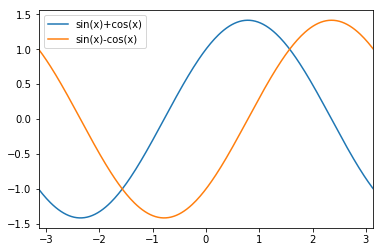

In [76]:
plotDF.plot()
plt.show()


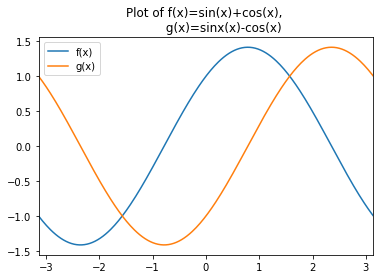

In [77]:
plotDF.columns=['f(x)','g(x)']
plotDF.plot(title='Plot of f(x)=sin(x)+cos(x), \n         g(x)=sinx(x)-cos(x)')
plt.show()


<b>Plot functions separately</b>

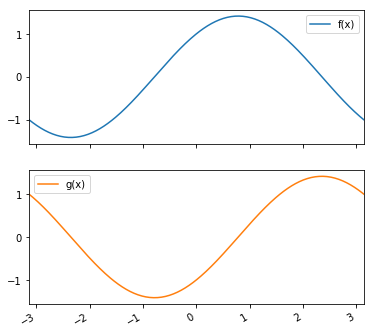

In [78]:
plotDF.plot(subplots=True, figsize=(6,6))
plt.show()
